In [100]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

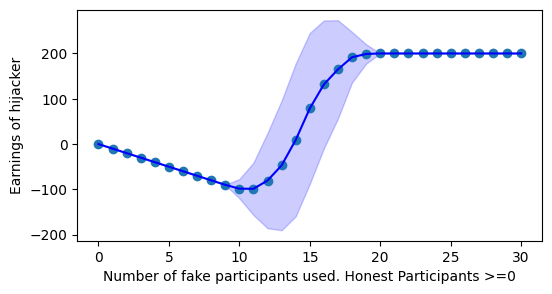

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (20, 200.0)
Amount Requried to stake at maximum earning for dishonest participants:  0


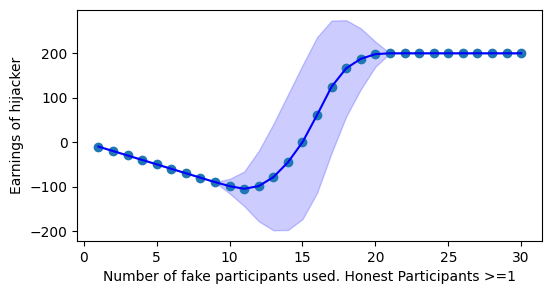

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (21, 200.0)
Amount Requried to stake at maximum earning for dishonest participants:  0


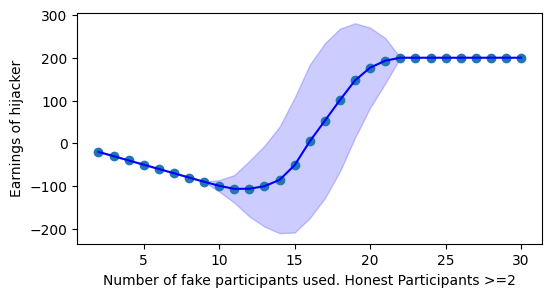

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (22, 200.0)
Amount Requried to stake at maximum earning for dishonest participants:  0


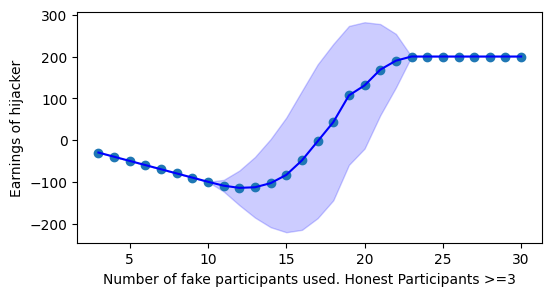

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (23, 200.0)
Amount Requried to stake at maximum earning for dishonest participants:  0


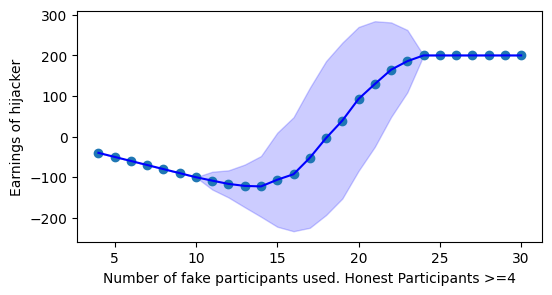

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (24, 200.0)
Amount Requried to stake at maximum earning for dishonest participants:  0


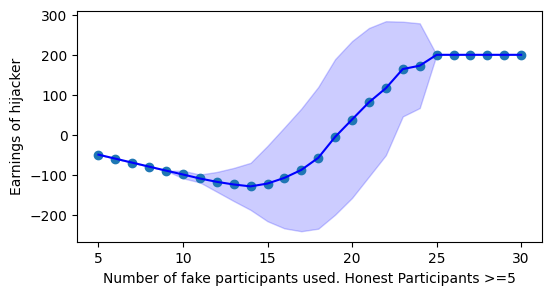

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (25, 200.0)
Amount Requried to stake at maximum earning for dishonest participants:  0


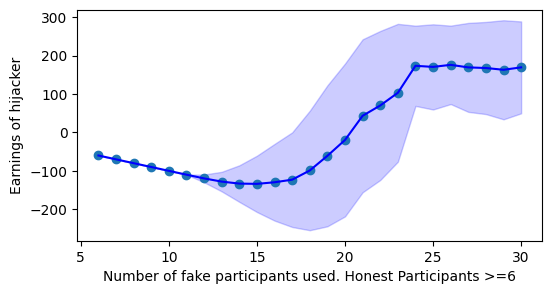

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (26, 176.08)
Amount Requried to stake at maximum earning for dishonest participants:  0


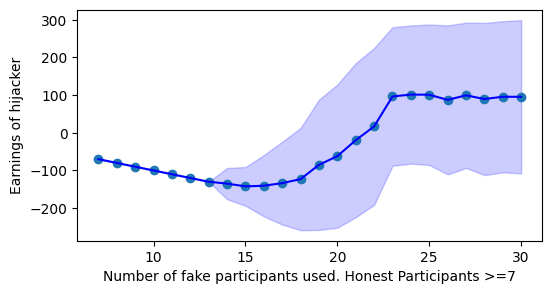

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (24, 101.44)
Amount Requried to stake at maximum earning for dishonest participants:  0


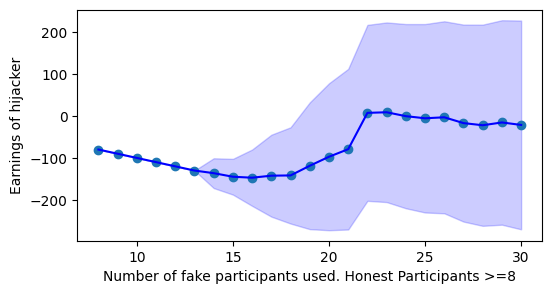

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (23, 8.65)
Amount Requried to stake at maximum earning for dishonest participants:  0


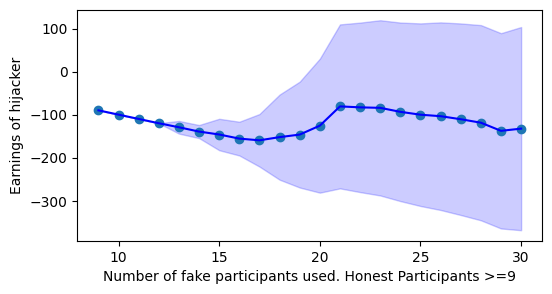

Expected earning for honest participants:  6.666666666666667
Cost of participation:  0
Maximum Earning for dishonest participants at:  (21, -80.85)
Amount Requried to stake at maximum earning for dishonest participants:  0


In [132]:
# can be seen that if amountVerified == 0 regardless of what costOfParticipation is, there still exist some 
# index i, where dishonest participants will be able to win.

# Can be seen that even if we have some amount of verifiers verified,
# even if we have cost of partipation to be 0, there is some value for amount verfied, where dishonest verifiers no longer come on top 

# do some proving and show that we definitely need the legitimate verifier list

win = 10
n = 30
k = 20
incorrectAnswer = win
costOfParticipation = 0 #win * k / n
amountVerified = 10

repetitions = 1000
amountWin = []
amountWinVar = []
for i in range(p, n + 1):
    winResults = []
    for j in range(repetitions):
        c = sum(int(b <= i) for b in random.sample(range(1, n + 1), k))
        if c >= k / 2:
            winResults.append(win * k - costOfParticipation * i)
        else:
            winResults.append(-i * (costOfParticipation + incorrectAnswer))
    amountWin.append((i, np.mean(winResults)))
    amountWinVar.append(np.var(winResults))

amountOfParticipants, amountWon = zip(*amountWin)

plt.figure(figsize=(6, 3))
plt.plot(amountOfParticipants, amountWon, label='Average Earning for dishonest participants', color='blue')
plt.fill_between(amountOfParticipants, 
                np.array(amountWon) - np.sqrt(amountWinVar), 
                np.array(amountWon) + np.sqrt(amountWinVar), 
                color='blue', alpha=0.2, label='Variance')

plt.xlabel('Number of fake participants used. Honest Participants >=' + str(p))
plt.ylabel('Earnings of hijacker')
plt.scatter(amountOfParticipants, amountWon)
plt.show()
print("Expected earning for honest participants: ", win * k / n - costOfParticipation)
print("Cost of participation: ", costOfParticipation)
indexOfMaxDishonestEarning = amountOfParticipants[amountWon.index(max(amountWon))]
print("Maximum Earning for dishonest participants at: ", (indexOfMaxDishonestEarning, max(amountWon)))
print("Amount Requried to stake at maximum earning for dishonest participants: ", (costOfParticipation * indexOfMaxDishonestEarning))

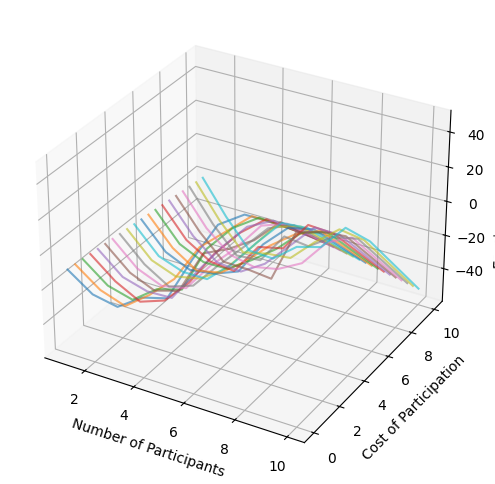

Expected earning for honest participants:  -5.0
Cost of participation:  10.0
Maximum Earning for dishonest participants at:  (1, -20.0)
Amount Required to stake at maximum earning for dishonest participants:  10.0
Expected earning for honest participants:  -5.0
Cost of participation:  10.0
Maximum Earning for dishonest participants at:  (2, -40.0)
Amount Required to stake at maximum earning for dishonest participants:  20.0


In [136]:
# can be seen that if amountVerified == 0 regardless of what costOfParticipation is, there still exist some 
# index i, where dishonest participants will be able to win.

# Can be seen that even if we have some amount of verifiers verified,
# even if we have cost of partipation to be 0, there is some value for amount verfied, where dishonest verifiers no longer come on top 

win = 10
n = 10
k = 5
incorrectAnswer = win
amountVerified = 2
repetitions = 100

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

costOfParticipation_range = np.linspace(0, win, 20)
for p in range(amountVerified):
    for costOfParticipation in costOfParticipation_range:
        amountWin = []
        for i in range(p + 1, n + 1):
            winResults = []
            for j in range(repetitions):
                c = sum(int(b <= i + p and b > p) + int(b <= p) * -1 for b in random.sample(range(1, n + 1), k))
                if c >= k / 2:
                    winResults.append(win * k - costOfParticipation * i)
                else:
                    winResults.append(-i * (costOfParticipation + incorrectAnswer))
            amountWin.append((i, np.mean(winResults)))

        amountOfParticipants, amountWon = zip(*amountWin)
        ax.plot(amountOfParticipants, [costOfParticipation] * len(amountOfParticipants), amountWon, label=f'p={p}', alpha=0.6)

    ax.set_xlabel('Number of Participants')
    ax.set_ylabel('Cost of Participation')
    ax.set_zlabel('Earnings of hijacker')
    #plt.title('Earnings of Participants vs Number of Participants and Cost of Participation. Number of honest participants: ', p)
    plt.show()

    print("Expected earning for honest participants: ", win * k / n - costOfParticipation)
    print("Cost of participation: ", costOfParticipation)
    indexOfMaxDishonestEarning = amountOfParticipants[amountWon.index(max(amountWon))]
    print("Maximum Earning for dishonest participants at: ", (indexOfMaxDishonestEarning, max(amountWon)))
    print("Amount Required to stake at maximum earning for dishonest participants: ", (costOfParticipation * indexOfMaxDishonestEarning))